# 기상청 기상자료 탐색적 데이터분석(EDA, Exploratory data analysis)

### Description
기상청 기상자료를 이용하여 EDA 분석을 실시한다.
* 지점     : 각 기상대 지점의 이름
* 월       : 기상자료의 해당 월(month)
* 평균기온 : 월간 평균기온
* 평균풍속 : 월간 평균풍속(m/s)
* 평균운량 : 월간 평균 구름의 량
* 일조시간합 : 월간 일조시간 합계(hr)
* 천천일사합 : 월간 일사량 합계(MJ/m2)
* 위      도 : 지점의 위도
* 경      도 : 지점의 경도

### Evaluation
Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). 

In [89]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 한글을 사용하기 위해
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path ="c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

### Load Dataset

In [90]:
# Train Data를 읽어들인다.
train = pd.read_csv("./weather_data.csv",encoding='EUC-KR')
train.head()

,지점,시간,평균기온(°C),평균풍속(m/s),평균운량,일조시간합,전천일사합,위도,경도
0,속초(90),1,-1.4,2.0,NaN,214.7,NaN,38.2509,128.5647
1,속초(90),2,-0.5,2.1,NaN,218.5,NaN,38.2509,128.5647
2,속초(90),3,8.0,2.2,NaN,171.2,NaN,38.2509,128.5647
3,속초(90),4,13.0,2.3,NaN,227.6,NaN,38.2509,128.5647
4,속초(90),5,15.9,2.0,NaN,186.4,NaN,38.2509,128.5647


### Data 구조분석

In [91]:
# File 구조분석
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 9 columns):
지점           1128 non-null object
시간           1212 non-null int64
평균기온(°C)     1128 non-null float64
평균풍속(m/s)    1126 non-null float64
평균운량         608 non-null float64
일조시간합        1128 non-null float64
전천일사합        499 non-null float64
위도           1128 non-null float64
경도           1128 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 85.3+ KB


In [92]:
train.지점.describe()

count        1128
unique         94
top       부안(243)
freq           12
Name: 지점, dtype: object

### 결측 Data 확인

In [139]:
train.isnull().sum()

지점            84
시간             0
평균기온(°C)      84
평균풍속(m/s)     86
평균운량         604
일조시간합         84
전천일사합        713
위도            84
경도            84
dtype: int64

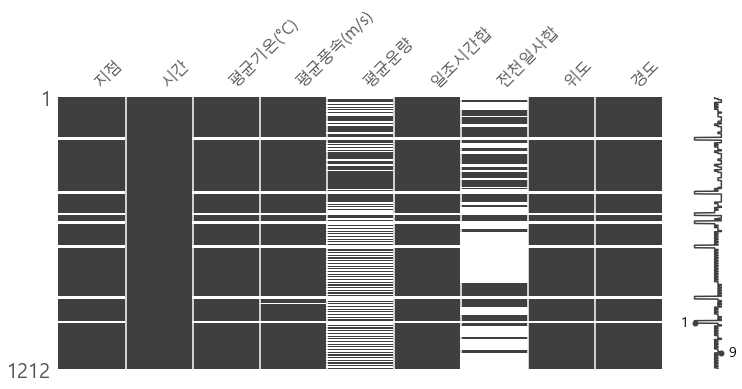

In [140]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

### Dataset 특성분석

In [141]:
#train["year"] = train["datetime"].dt.year
#train["month"] = train["datetime"].dt.month
#train["day"] = train["datetime"].dt.day
#train["hour"] = train["datetime"].dt.hour
#train["minute"] = train["datetime"].dt.minute
#train["second"] = train["datetime"].dt.second
#train.shape

In [142]:
train.head()

,지점,시간,평균기온(°C),평균풍속(m/s),평균운량,일조시간합,전천일사합,위도,경도
0,속초(90),1,-1.4,2.0,NaN,214.7,NaN,38.2509,128.5647
1,속초(90),2,-0.5,2.1,NaN,218.5,NaN,38.2509,128.5647
2,속초(90),3,8.0,2.2,NaN,171.2,NaN,38.2509,128.5647
3,속초(90),4,13.0,2.3,NaN,227.6,NaN,38.2509,128.5647
4,속초(90),5,15.9,2.0,NaN,186.4,NaN,38.2509,128.5647


[Text(0.5,0,'평균기온'), Text(0.5,1,'월별 평균기온')]

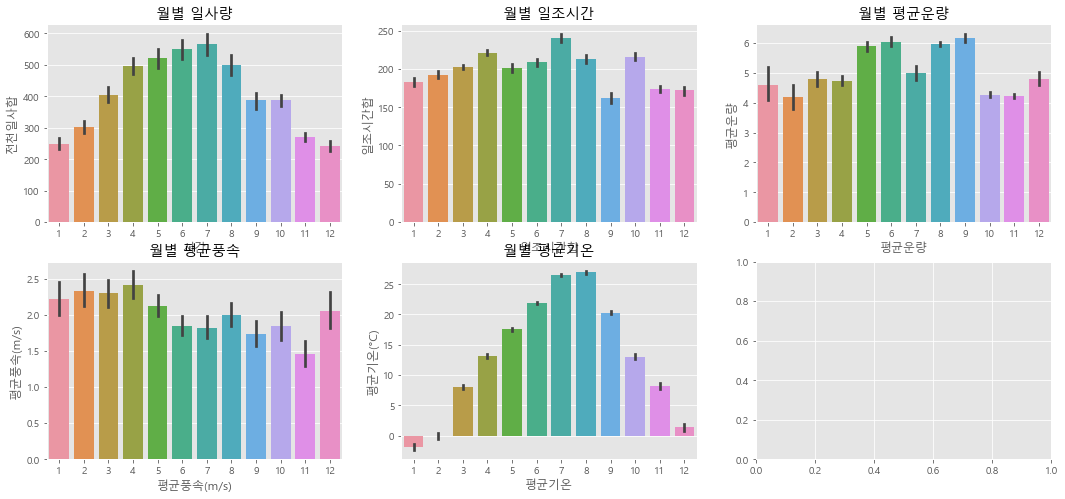

In [143]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="시간", y="전천일사합", ax=ax1)
sns.barplot(data=train, x="시간", y="일조시간합", ax=ax2)
sns.barplot(data=train, x="시간", y="평균운량", ax=ax3)
sns.barplot(data=train, x="시간", y="평균풍속(m/s)", ax=ax4)
sns.barplot(data=train, x="시간", y="평균기온(°C)", ax=ax5)

ax1.set(ylabel='전천일사합',title="월별 일사량")
ax2.set(xlabel='일조시간합',title="월별 일조시간")
ax3.set(xlabel='평균운량', title="월별 평균운량")
ax4.set(xlabel='평균풍속(m/s)', title="월별 평균풍속")
ax5.set(xlabel='평균기온', title="월별 평균기온")


* 월별 일사량은 7월이 가장 높다. (4,5,6,7,8월이 가장 좋다)
* 월별 일조시간은 7월이 가장 높으며 4월과 10월도 높은 것을 알 수 있다. (8월과 9월은 장마로 인하여 낮은 것으로 보인다.)
* 평균운량은 5,6월 8,9월이 가장 높다.
* 월별 평균풍속은 1,2,3,4,12월이 가장 높다.
* 월별 평균기온은 7,8월이 가장 높으며 25도 이상이다.

[Text(0,0.5,'월'), Text(0.5,0,'일조시간합'), Text(0.5,1,'월별일조시간')]

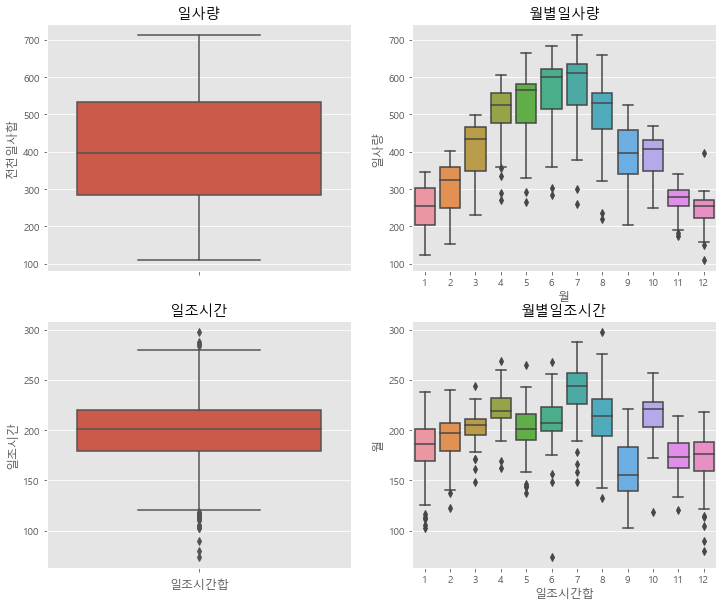

In [144]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="전천일사합",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="전천일사합",x="시간",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="일조시간합",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="일조시간합",x="시간",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='전천일사합',title="일사량")
axes[0][1].set(xlabel='월', ylabel='일사량',title="월별일사량")
axes[1][0].set(xlabel='일조시간합', ylabel='일조시간',title="일조시간")
axes[1][1].set(xlabel='일조시간합', ylabel='월',title="월별일조시간")

In [145]:
#train["dayofweek"] = train["datetime"].dt.dayofweek
#train.shape

In [146]:
#train["dayofweek"].value_counts()

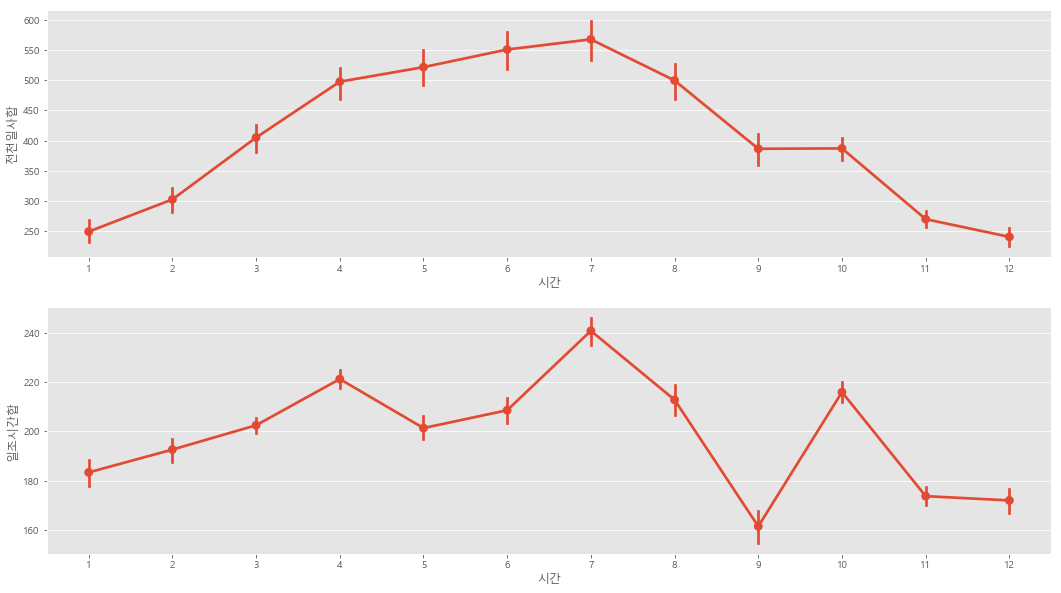

In [147]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(18,10)

sns.pointplot(data=train, x="시간", y="전천일사합", ax=ax1)

sns.pointplot(data=train, x="시간", y="일조시간합", ax=ax2)


In [148]:
corrMatt = train[["시간", "평균기온(°C)", "평균풍속(m/s)", "평균운량", "일조시간합", "전천일사합", "위도", "경도"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                     시간  평균기온(°C)  평균풍속(m/s)      평균운량     일조시간합     전천일사합  \
시간         1.000000e+00  0.263012  -0.204591 -0.125430 -0.160609 -0.102487   
평균기온(°C)   2.630122e-01  1.000000  -0.061535  0.561483  0.352269  0.686948   
평균풍속(m/s) -2.045913e-01 -0.061535   1.000000  0.161938  0.022296 -0.111684   
평균운량      -1.254299e-01  0.561483   0.161938  1.000000 -0.381690  0.227468   
일조시간합     -1.606092e-01  0.352269   0.022296 -0.381690  1.000000  0.559237   
전천일사합     -1.024875e-01  0.686948  -0.111684  0.227468  0.559237  1.000000   
위도        -7.636282e-19 -0.113710  -0.225256 -0.117994  0.149647  0.137545   
경도         0.000000e+00 -0.008687  -0.155977 -0.063492  0.066987 -0.098854   

                     위도        경도  
시간        -7.636282e-19  0.000000  
평균기온(°C)  -1.137101e-01 -0.008687  
평균풍속(m/s) -2.252556e-01 -0.155977  
평균운량      -1.179935e-01 -0.063492  
일조시간합      1.496472e-01  0.066987  
전천일사합      1.375449e-01 -0.098854  
위도         1.000000e+00  0.248013  
경도       

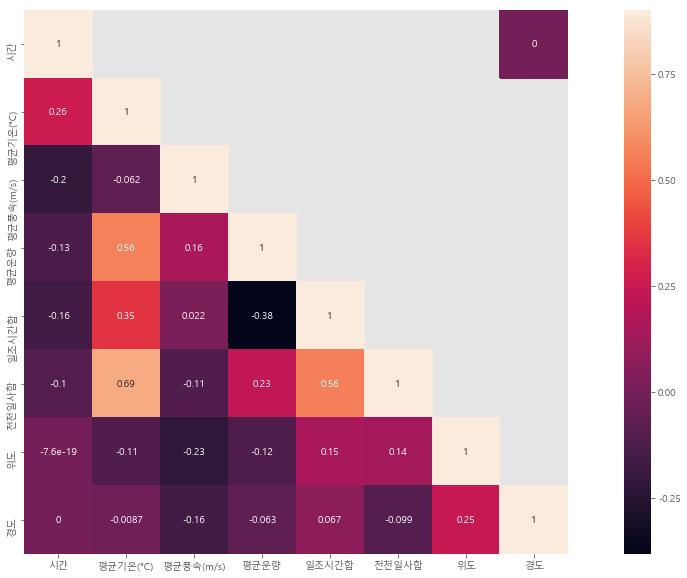

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask, vmax=0.9, square=True,annot=True)

* 경도는 대체적으로 상관관계가 없다.
* 위도는 일조시간과 일사량과 상관관계가 있다.
* 일조시간과 일사량과는 상관관계가 매우 높다.
* 일사량과 운량과는 상관관계가 있다.
* 일사량과 평균기온은 상관관계가 제일 높다.

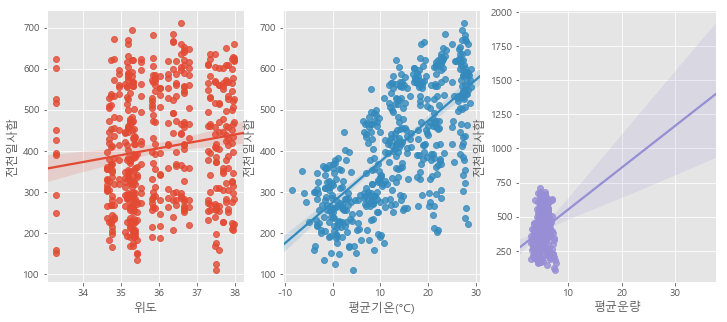

In [163]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="위도", y="전천일사합", data=train,ax=ax1)
sns.regplot(x="평균기온(°C)", y="전천일사합", data=train,ax=ax2)
sns.regplot(x="평균운량", y="전천일사합", data=train,ax=ax3)

* 대체적으로 산포도를 그려보면 의도하였던 위도에 따른 일사량보다는 평균기온에 대한 일사량이 적정한 산포도를 그려주고 있다.

In [164]:
#def concatenate_year_month(datetime):
#    return "{0}-{1}".format(datetime.year, datetime.month)

#train["year_month"] = train["datetime"].apply(concatenate_year_month)

#print(train.shape)
#train[["datetime", "year_month"]].head()

In [165]:
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
#fig.set_size_inches(18, 4)

#sns.barplot(data=train, x="year", y="count", ax=ax1)
#sns.barplot(data=train, x="month", y="count", ax=ax2)

#fig, ax3 = plt.subplots(nrows=1, ncols=1)
#fig.set_size_inches(18, 4)

#sns.barplot(data=train, x="year_month", y="count", ax=ax3)

* 2011년보다 2012년의 대여량이 더 많다.
* 겨울보다는 여름에 대여량이 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

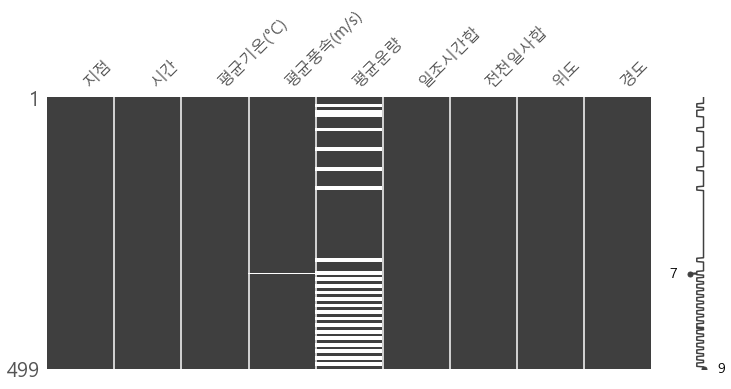

In [166]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["전천일사합"] - train["전천일사합"].mean()) <= (3*train["전천일사합"].std())]
msno.matrix(trainWithoutOutliers, figsize=(12,5))


In [179]:
# NaN으로 된 평균운량 Data를 0으로 바꾸어준다.

trainWithoutOutliers["평균운량"] = trainWithoutOutliers["평균운량"].fillna(0)

trainWithoutOutliers.dropna(subset=["평균풍속(m/s)"],inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [180]:
print(trainWithoutOutliers.head())

         지점  시간  평균기온(°C)  평균풍속(m/s)  평균운량  일조시간합   전천일사합       위도        경도
12  북춘천(93)   1      -6.0        1.3   3.9  203.0  297.61  37.9475  127.7547
13  북춘천(93)   2      -3.4        1.5   3.6  214.2  345.45  37.9475  127.7547
14  북춘천(93)   3       7.0        1.8   4.6  204.3  434.45  37.9475  127.7547
15  북춘천(93)   4      12.0        1.9   4.9  218.7  505.89  37.9475  127.7547
16  북춘천(93)   5      17.2        1.7   5.4  233.2  577.58  37.9475  127.7547


((array([-2.99026222, -2.70816415, -2.54952923, -2.43704007, -2.34889472,
         -2.27592629, -2.21337775, -2.15845073, -2.10935447, -2.0648712 ,
         -2.02413386, -1.98650235, -1.95149018, -1.91871861, -1.88788682,
         -1.85875172, -1.83111399, -1.80480807, -1.77969485, -1.75565634,
         -1.73259152, -1.71041322, -1.68904566, -1.66842256, -1.6484856 ,
         -1.62918314, -1.61046928, -1.592303  , -1.57464751, -1.55746965,
         -1.54073944, -1.5244297 , -1.50851568, -1.49297478, -1.47778632,
         -1.46293132, -1.44839231, -1.43415318, -1.42019903, -1.40651606,
         -1.39309148, -1.37991336, -1.36697062, -1.35425291, -1.34175053,
         -1.32945444, -1.31735612, -1.30544762, -1.29372142, -1.28217046,
         -1.27078809, -1.25956802, -1.24850431, -1.23759135, -1.22682383,
         -1.21619669, -1.20570515, -1.19534468, -1.18511095, -1.17499986,
         -1.16500748, -1.15513009, -1.14536414, -1.13570621, -1.12615308,
         -1.11670163, -1.10734889, -1.

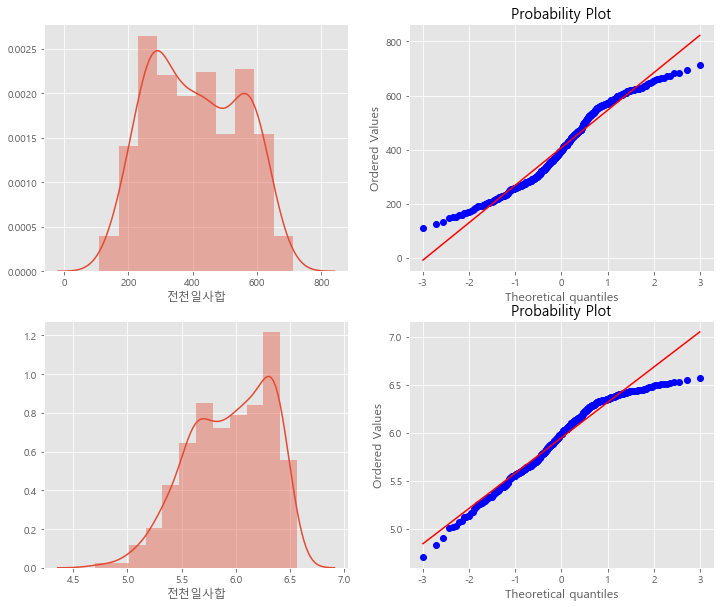

In [181]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(trainWithoutOutliers["전천일사합"], ax=axes[0][0])
stats.probplot(trainWithoutOutliers["전천일사합"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["전천일사합"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["전천일사합"]), dist='norm', fit=True, plot=axes[1][1])

전천일사합 변수가 왼쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.

참고 : [EDA & Ensemble Model (Top 10 Percentile) | Kaggle](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile)

In [182]:
trainWithoutOutliers . to_csv ( "./train_EDA.csv" )